# ChiKit Ho
# Phys 243 Homework #3

# Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data
url1="https://raw.githubusercontent.com/abtinshahidi/Foundation_applied_machine_learning/master/homeworks/2021/data/birthrate.dat"
Names=['Nation','BirthRate','PCI','PropOnFarms','MortalityRate']
data1=pd.read_csv(url1,header=None,delim_whitespace=True,names=Names)

In [3]:
data1.head()

,Nation,BirthRate,PCI,PropOnFarms,MortalityRate
0,Venezuela,46.4,392,0.40,68.5
1,Mexico,45.7,118,0.61,87.8
2,Ecuador,45.3,44,0.53,115.8
3,Colombia,38.6,158,0.53,106.8
4,Ceylon,37.2,81,0.53,71.6


In [4]:
#Check data1's dimension
data1.shape

(29, 5)

There are three features for the lienar model (Per Capita Income, Proportion of population on farms and Infant Mortality Rate). The linear regression model is y= $\theta_0 + \theta_1x_1 + \theta_2x_2 +\theta_3x_3$

In [5]:
X=data1.iloc[:,2:]
Y=data1.iloc[:,1:2]

In [6]:
Y.head()

,BirthRate
0,46.4
1,45.7
2,45.3
3,38.6
4,37.2


In [7]:
#Dimension of X and Y
X.shape, Y.shape

((29, 3), (29, 1))

In [8]:
X_b=np.c_[np.ones((len(X),1)),X]

In [9]:
#Check Data Type
type(Y)

pandas.core.frame.DataFrame

Using the TA's code, the best weight we found is shown as the following,

In [10]:
inv=np.linalg.inv
weight_best=inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [11]:
weight_best

array([[6.17713470e+00],
       [5.53043266e-03],
       [8.79467539e+00],
       [2.38888103e-01]])

Now I try to fit theta myself..

In [12]:
def Grad_Descent (X,Y,W,alpha,iters):
    N=len(Y)
    g_hist=np.zeros(iters)
    W_hist=np.zeros((iters,4)) #4 thetas
    
    for i in range (iters):
        y_hat=np.dot(X,W)
        W = W-(2/N) *alpha*(X.T.dot((y_hat-Y))) #gradient function from TA's notes
        W_hist[i,:]=W.T
        g_hist[i]=L_2 (X,Y,W).values
    
    return W, g_hist, W_hist

In [13]:
#Loss function
def L_2 (X,Y,W):
    Num=len(Y)
    num=len(W)
    Y=np.reshape(Y,(Num,1))
    W=np.reshape(W,(num,1))
    s_loss=(X.dot(W)-Y)
    Loss=1/Num*s_loss.T.dot(s_loss)
    return Loss

In [23]:
alpha=0.0001
n_iters=100
theta=np.random.randn(4,1)
theta_batch=[theta]
theta,Loss_hist,theta_batch=Grad_Descent(X_b,Y,theta,alpha,n_iters)

In [24]:
theta

array([[-1.61781818e+186],
       [-1.28986114e+189],
       [-3.73445731e+185],
       [-6.03456544e+187]])

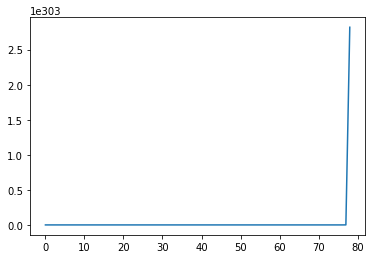

In [25]:
plt.plot(Loss_hist)
plt.show()

#Using the best fit weight and the code from the TA, the loss function vrsus seps of the gradient decent is the following

In [26]:
#Part 3
#Using my theta
np.array([1,993,0.19,33.7]).dot(theta)

array([-1.28286745e+192])

In [27]:
#Using the best fit weight
np.array([1,993,0.19,33.7]).dot(weight_best)

array([21.39037172])

# Problem 2

In [28]:
#import data
url2='https://raw.githubusercontent.com/abtinshahidi/Foundation_applied_machine_learning/master/homeworks/2021/data/logistic_reg.csv'
data2=pd.read_csv(url2,sep=',')

In [29]:
data2.shape

(200, 4)

In [30]:
data2.head()

,Unnamed: 0,X1,X2,y
0,0,3.206197,3.256028,1
1,1,-3.801475,0.203568,1
2,2,2.540271,2.380449,1
3,3,3.442366,3.552647,1
4,4,-2.672117,1.791972,1


There are 2 features X1 and X2

In [31]:
#Part 1
#Divided into 70/30 percent for training/testing
training=data2.iloc[:140,:]
testing=data2.iloc[140:,:]

In [32]:
training.shape,testing.shape

((140, 4), (60, 4))

In [34]:
len(testing.columns)

4

In [35]:
#Logistic sigmoid function
def sigmoid (X,W):
    z=np.dot(X,W)
    return 1/(1+np.exp(-z))

In [36]:
#Cross Entropy loss function from the lecture#6 notes
def Entropy (X,Y,W):
    p=len(X)
    y_hat2=sigmoid(X,W)
    return -(1/p)*np.sum(Y*np.log(y_hat2)+(1-Y)*np.log(1-y_hat2))

In [72]:
#Since the Cross Entropy cost is always convex, so we can use gradient decent for the optimation
def grad_decent_Logreg (X,Y,W,alpha,iters):
    m=len(X)
    g=[Entropy(X,Y,W)]
    for i in range (iters):
        y_hat2=sigmoid(X,W)
        W=W-(alpha/m)*np.dot(X.T,y_hat2-Y)
        g.append(Entropy(X,Y,W))
    return g, W

In [73]:
def fit (X,Y,W,alpha,iters):
    g,W=grad_decent_Logreg(X,Y,W,alpha,iters)
    return g,W

In [74]:
def accurancy (X,Y,W):
    z=sigmoid(X,W)
    for i in range (len(Y)):
        if z[i]>=0.5:
            z[i]=1
        else:
            z[i]=0
    Y=list(Y.values)
    accurancy=np.sum([Y[i]==z[i] for i in range (len(Y))])/len(Y)
    return accurancy

In [75]:
X.training=training.drop(columns=["Unnamed: 0","y"])
Y.training=training.drop(columns=["Unnamed: 0","X1","X2"])
X.testing=testing.drop(columns=["Unnamed: 0","y"])
Y.testing=testing.drop(columns=["Unnamed: 0","X1","X2"])

In [76]:
#Check the dimension
X.training.shape,Y.training.shape,X.testing.shape,Y.testing.shape

((140, 2), (140, 1), (60, 2), (60, 1))

In [77]:
#Check datatype
type(Y.training)

pandas.core.frame.DataFrame

In [78]:
alpha2=0.0001
n_iters2=500
theta2=np.random.randn(2,1)
Loss2,theta2=fit(X.training,Y.training,theta2,alpha2,n_iters2)

In [79]:
#The best parameter
theta2

array([[ 1.74419004],
       [-0.41877362]])

3. Find the performance

In [80]:
acc=accurancy(X.testing,Y.testing,theta2)
acc

0.5666666666666667